In [1]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

Using TensorFlow backend.
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py



> 90.883
> 90.958


KeyboardInterrupt: 

In [4]:
import keras
from keras.datasets import fashion_mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
x_train_prep = x_train / 255
x_test_prep = x_test / 255

x_train_prep_1d = x_train_prep.reshape(-1, 28 * 28)
x_test_prep_1d = x_test_prep.reshape(-1, 28 * 28)

x_train_prep_3d = x_train_prep.reshape(-1, 28, 28, 1)
x_test_prep_3d = x_test_prep.reshape(-1, 28, 28, 1)

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [18]:
import heapq
from sklearn.metrics import classification_report

def find_example(model, x, y, true_class, predicted_class):
    y_true = y
    y_pred = model.predict(x)
    found_index = None
    for index, (current_y_true, current_y_pred) in enumerate(zip(y_true, y_pred)):
        if current_y_true == true_class and current_y_pred == predicted_class:
            found_index = index
            break
    return found_index

def plot_example(model, x, y, true_class, predicted_class, value=None):
    index = find_example(model, x, y, true_class, predicted_class)
    print('True class:', classes[true_class])
    print('Predicted class:', classes[predicted_class])
    if value is not None:
        print('Misclassified', value, 'times')
    if index is not None:
        plt.imshow(x_test_prep[index])
        plt.show()
    print('')

target_names = ['0','1', '2', '3','4', '5','6','7','8','9']

def analyze_model(model, x, y, inspect_n=10):
    y_pred = model.predict(x)
    print(classification_report(y, y_pred, target_names=target_names))
    conf_matrix = confusion_matrix(y, y_pred)
    print('Confusion matrix:')
    print(conf_matrix)
    print('')
    for _ in range(10):
        conf_matrix[_][_] = 0
    conf_matrix_flat = conf_matrix.reshape(-1, 1)
    biggest_indices = heapq.nlargest(inspect_n, range(len(conf_matrix_flat)), conf_matrix_flat.take)
    biggest_indices = np.unravel_index(biggest_indices, conf_matrix.shape)
    highest_values = conf_matrix[biggest_indices]  
#    for x_index, y_index, value in zip(biggest_indices[0], biggest_indices[1], highest_values):
#        plot_example(model, x, y, x_index, y_index, value)

In [19]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
print(np.mean(cross_val_score(estimator=naive_bayes, cv=4, scoring='accuracy', X=x_train_prep_1d, y=y_train)))
naive_bayes.fit(x_train_prep_1d, y_train)

0.5900666666666666


GaussianNB()

In [12]:
analyze_model(naive_bayes, x_test_prep_1d, y_test)

              precision    recall  f1-score   support

           1       0.81      0.59      0.68      1000
           2       0.64      0.94      0.76      1000
           3       0.59      0.32      0.42      1000
           4       0.44      0.55      0.49      1000
           5       0.38      0.78      0.51      1000
           6       0.93      0.28      0.43      1000
           7       0.32      0.04      0.07      1000
           8       0.51      0.99      0.67      1000
           9       0.83      0.71      0.77      1000
          10       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000

Confusion matrix:
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   

In [20]:
#random forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1)
rf_param_grid = {'max_depth': [3, 3, 3, 3], 
                 'max_features': ['auto', 'log2', 0.15, None]}
rf_gridsearch = GridSearchCV(cv=4, estimator=random_forest, param_grid=rf_param_grid, scoring='accuracy', n_jobs=1)
rf_gridsearch.fit(x_train_prep_1d, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_estimators=1), n_jobs=1,
             param_grid={'max_depth': [3, 3, 3, 3],
                         'max_features': ['auto', 'log2', 0.15, None]},
             scoring='accuracy')

In [21]:
print(rf_gridsearch.best_params_)
print(rf_gridsearch.best_score_)

{'max_depth': 3, 'max_features': 0.15}
0.5175333333333333


In [22]:
analyze_model(rf_gridsearch, x_test_prep_1d, y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.96      0.78      0.86      1000
           2       0.28      0.93      0.43      1000
           3       0.34      0.89      0.50      1000
           4       0.00      0.00      0.00      1000
           5       0.81      0.18      0.29      1000
           6       0.00      0.00      0.00      1000
           7       0.51      0.88      0.64      1000
           8       0.76      0.22      0.34      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.47     10000
   macro avg       0.45      0.47      0.39     10000
weighted avg       0.45      0.47      0.39     10000

Confusion matrix:
[[  0   8  89 880   0   2   0   8   3  10]
 [  0 784  11 191   0   7   0   5   2   0]
 [  0   5 932  38   0   3   0   7   9   6]
 [  0   7  76 893   0   0   0  12  12   0]
 [  0   5 857 130   0   1   0   5   1   1]
 [  0   

C:\Users\97252\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.14.0
Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 6.694s


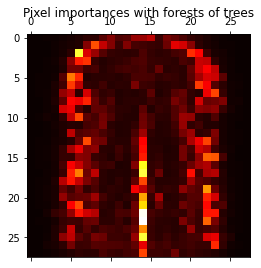

In [27]:
import tensorflow as tf

print(tf.__version__)

from time import time
import matplotlib.pyplot as plt
 
#from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier
 
# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1
 

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# Load the faces dataset
data = fashion_mnist
X = train_images.reshape((len(train_images), -1))
y = train_labels
 
mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]
 
# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=50,
                              max_features=20,
                              n_jobs=n_jobs,
                              random_state=0)
 
forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(train_images[0].shape)
 
# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()